## Problem Statement
# Estimate the Time required for Food Delivery

# About the Dataset
Food delivery is a courier service in which a restaurant, store, or independent food-delivery company delivers food to a customer. An order is typically made either through a restaurant or grocer's website or mobile app, or through a food ordering company. The delivered items can include entrees, sides, drinks, desserts, or grocery items and are typically delivered in boxes or bags. The delivery person will normally drive a car, but in bigger cities where homes and restaurants are closer together, they may use bikes or motorized scooters.

# Columns Description:
**ID:**   Identifier for the records.

**Delivery_person_ID**: Identifier for the delivery person.

**Delivery_person_Age**: Age of the delivery person.

**Delivery_person_Ratings**: Ratings or performance score of the delivery person.

**Restaurant_latitude**: Latitude of the restaurant where the order was placed.

**Restaurant_longitude**: Longitude of the restaurant where the order was placed.

**Delivery_location_latitude**: Latitude of the delivery location.

**Delivery_location_longitude**: Longitude of the delivery location.

**Order_Date**: Date when the order was placed.

**Time_Orderd**: Time when the order was placed.

**Time_Order_picked**: Time when the order was picked up for delivery.

**Weatherconditions**: Weather conditions at the time of delivery.

**Road_traffic_density**: Level of road traffic density during delivery.

**Vehicle_condition**: Condition or status of the delivery vehicle.

**Type_of_order**: Type or category of the order (e.g., dine-in, takeout).

**Type_of_vehicle**: Type of vehicle used for delivery (e.g., car, bike).

**multiple_deliveries**: Indicates whether there were multiple deliveries on the same trip.

**Festival**: Indicates whether the delivery occurred during a festival.

**City**: City where the delivery took place.

**Time_taken(min)**: Time taken to complete the delivery in minutes.

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")

# Reading the Dataset

In [ ]:
df=pd.read_csv("/content/train.csv")
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


# Data Description

In [ ]:
df.shape

(45593, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [ ]:
df.describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,17.017729,70.231332,17.465186,70.845702,1.023359
std,8.185109,22.883647,7.335122,21.118812,0.839065
min,-30.905562,-88.366217,0.010000,0.010000,0.000000
25%,12.933284,73.170000,12.988453,73.280000,0.000000
50%,18.546947,75.898497,18.633934,76.002574,1.000000
75%,22.728163,78.044095,22.785049,78.107044,2.000000
max,30.914057,88.433452,31.054057,88.563452,3.000000


In [ ]:
df.nunique()

ID                             45593
Delivery_person_ID              1320
Delivery_person_Age               23
Delivery_person_Ratings           29
Restaurant_latitude              657
Restaurant_longitude             518
Delivery_location_latitude      4373
Delivery_location_longitude     4373
Order_Date                        44
Time_Orderd                      177
Time_Order_picked                193
Weatherconditions                  7
Road_traffic_density               5
Vehicle_condition                  4
Type_of_order                      4
Type_of_vehicle                    4
multiple_deliveries                5
Festival                           3
City                               4
Time_taken(min)                   45
dtype: int64

In [ ]:
for i in df.columns:
  print(i,"\n")
  print(df[i].value_counts(),"\n")

ID 

0x4607     1
0x1f3e     1
0xe251     1
0x3f31     1
0x4a78     1
          ..
0xc3f1     1
0x5db7     1
0x1985     1
0xceda     1
0x5fb2     1
Name: ID, Length: 45593, dtype: int64 

Delivery_person_ID 

PUNERES01DEL01     67
JAPRES11DEL02      67
HYDRES04DEL02      66
JAPRES03DEL01      66
VADRES11DEL02      66
                   ..
DEHRES18DEL03       7
AURGRES11DEL03      7
KOLRES09DEL03       6
KOCRES16DEL03       6
BHPRES010DEL03      5
Name: Delivery_person_ID, Length: 1320, dtype: int64 

Delivery_person_Age 

35      2262
36      2260
37      2227
30      2226
38      2219
24      2210
32      2202
22      2196
29      2191
33      2187
28      2179
25      2174
34      2166
26      2159
21      2153
27      2150
39      2144
20      2136
31      2120
23      2087
NaN     1854
50        53
15        38
Name: Delivery_person_Age, dtype: int64 

Delivery_person_Ratings 

4.8     7148
4.7     7142
4.9     7041
4.6     6940
5       3996
4.5     3303
NaN     1908
4.1     1430
4

# Dropping Unwanted columns

In [ ]:
df.drop(['ID'],axis=1,inplace=True)

In [ ]:
df.drop(['Delivery_person_ID'],axis=1,inplace=True)

In [ ]:
df.drop(['Order_Date'],axis=1,inplace=True)

# Data Cleaning

In [ ]:
op=[]
for i in df['Time_taken(min)']:
  a = i.split()
  op.append(int(a[1]))
df['Time_taken'] = op
df.drop(['Time_taken(min)'],axis=1,inplace=True)

In [ ]:
ol=[]
for i in df['Weatherconditions']:
  a = i.split()
  ol.append(a[1])
df['Weatherconditions'] = ol

# Handling Null Values

In [ ]:
df['Delivery_person_Age']=df['Delivery_person_Age'].replace('NaN ', np.nan)
df['Delivery_person_Ratings']=df['Delivery_person_Ratings'].replace('NaN ', np.nan)
df['Time_Orderd']=df['Time_Orderd'].replace('NaN ', np.nan)
df['Weatherconditions']=df['Weatherconditions'].replace('conditions NaN', np.nan)
df['Road_traffic_density']=df['Road_traffic_density'].replace('NaN ', np.nan)
df['multiple_deliveries']=df['multiple_deliveries'].replace('NaN ', np.nan)
df['Festival']=df['Festival'].replace('NaN ', np.nan)
df['City']=df['City'].replace('NaN ', np.nan)

In [ ]:
for i in df.columns:
    if df[i].isna().sum()>0:
        print(f"{i} :",df[i].isna().sum()/len(df[i])*100)

Delivery_person_Age : 4.066413703858048
Delivery_person_Ratings : 4.184852937951001
Time_Orderd : 3.7966354484241003
Road_traffic_density : 1.318184809071568
multiple_deliveries : 2.177965915820411
Festival : 0.5000767661702454
City : 2.631982979843397


In [ ]:
m1=df['multiple_deliveries'].mode()[0]
df['multiple_deliveries'].fillna(m1,inplace=True)
m2=df['Vehicle_condition'].mode()[0]
df['Vehicle_condition'].fillna(m2,inplace=True)

In [ ]:
md1=df['Delivery_person_Age'].median()
df['Delivery_person_Age'].fillna(md1, inplace=True)
md2=df['Delivery_person_Ratings'].median()
df['Delivery_person_Ratings'].fillna(md2, inplace=True)
md3=df['Time_Orderd'].mode()[0]
df['Time_Orderd'].fillna(md3, inplace=True)
md4=df['Weatherconditions'].mode()[0]
df['Weatherconditions'].fillna(md4,inplace=True)
md5=df['Road_traffic_density'].mode()[0]
df['Road_traffic_density'].fillna(md5,inplace=True)
md7=df['Festival'].mode()[0]
df['Festival'].fillna(md7,inplace=True)
md8=df['City'].mode()[0]
df['City'].fillna(md8,inplace=True)

In [ ]:
df['Delivery_person_Age'] = pd.to_numeric(df['Delivery_person_Age'])
df['Delivery_person_Ratings'] = pd.to_numeric(df['Delivery_person_Ratings'])
df['Vehicle_condition'] = pd.to_numeric(df['Vehicle_condition'])

In [ ]:
df['Delivery_person_Age'] = df['Delivery_person_Age'].astype('int')

# Exploratory Data Analysis

## Univariate Analysis

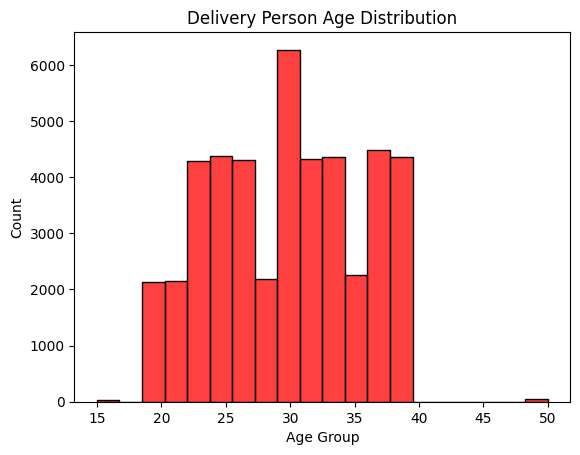

In [ ]:
sns.histplot(df.Delivery_person_Age,bins=20,kde=False,color='Red')
plt.title("Delivery Person Age Distribution")
plt.xlabel("Age Group")
plt.show()

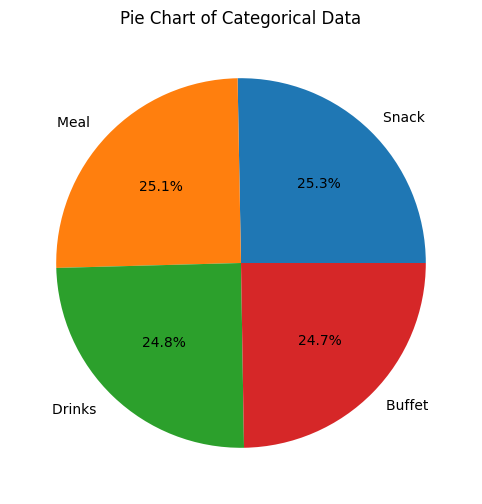

In [ ]:
frequency = df['Type_of_order'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(frequency, labels=frequency.index, autopct='%1.1f%%')
plt.title('Pie Chart of Categorical Data')
plt.show()

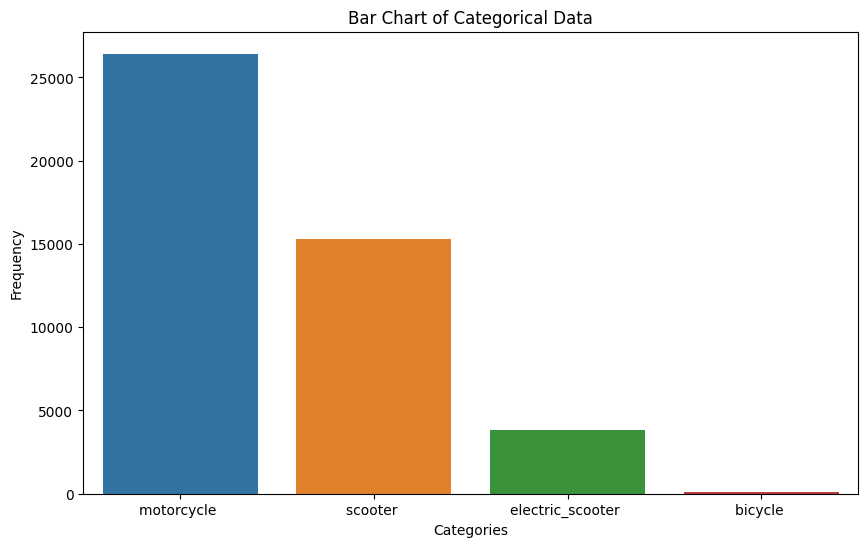

In [ ]:
frequency = df['Type_of_vehicle'].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Type_of_vehicle')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Bar Chart of Categorical Data')
plt.show()

# BiVariate Analysis

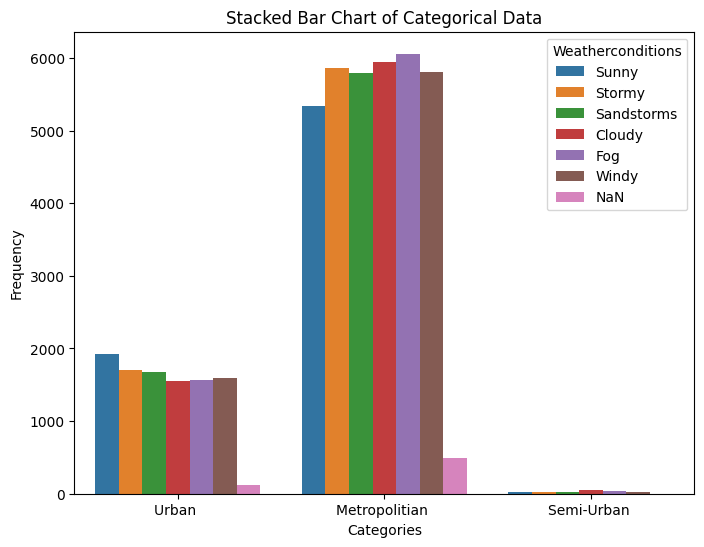

In [ ]:
# Create a stacked bar plot
frequency = df['City'].value_counts()
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='City', hue='Weatherconditions')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Stacked Bar Chart of Categorical Data')
plt.legend(title='Weatherconditions')
plt.show()

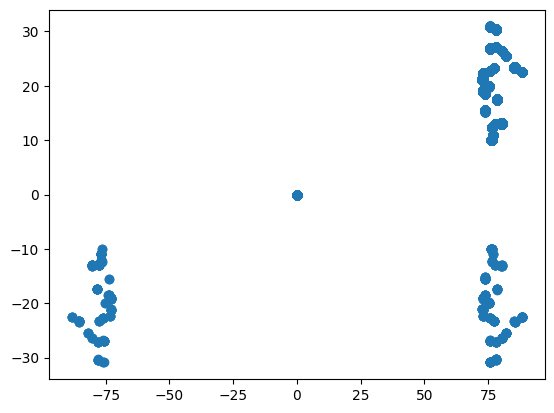

In [ ]:
plt.scatter(x=df['Restaurant_longitude'],y=df['Restaurant_latitude'])
plt.show()

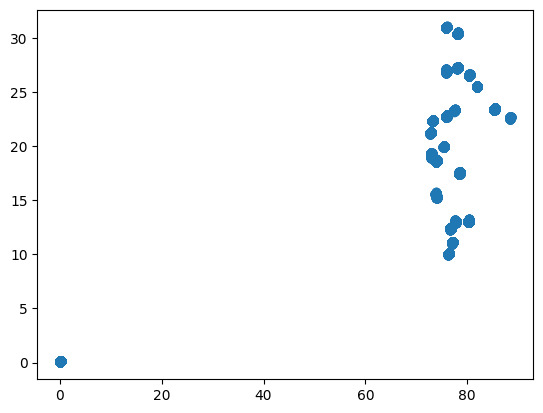

In [ ]:
plt.scatter(x=df['Delivery_location_longitude'],y=df['Delivery_location_latitude'])
plt.show()

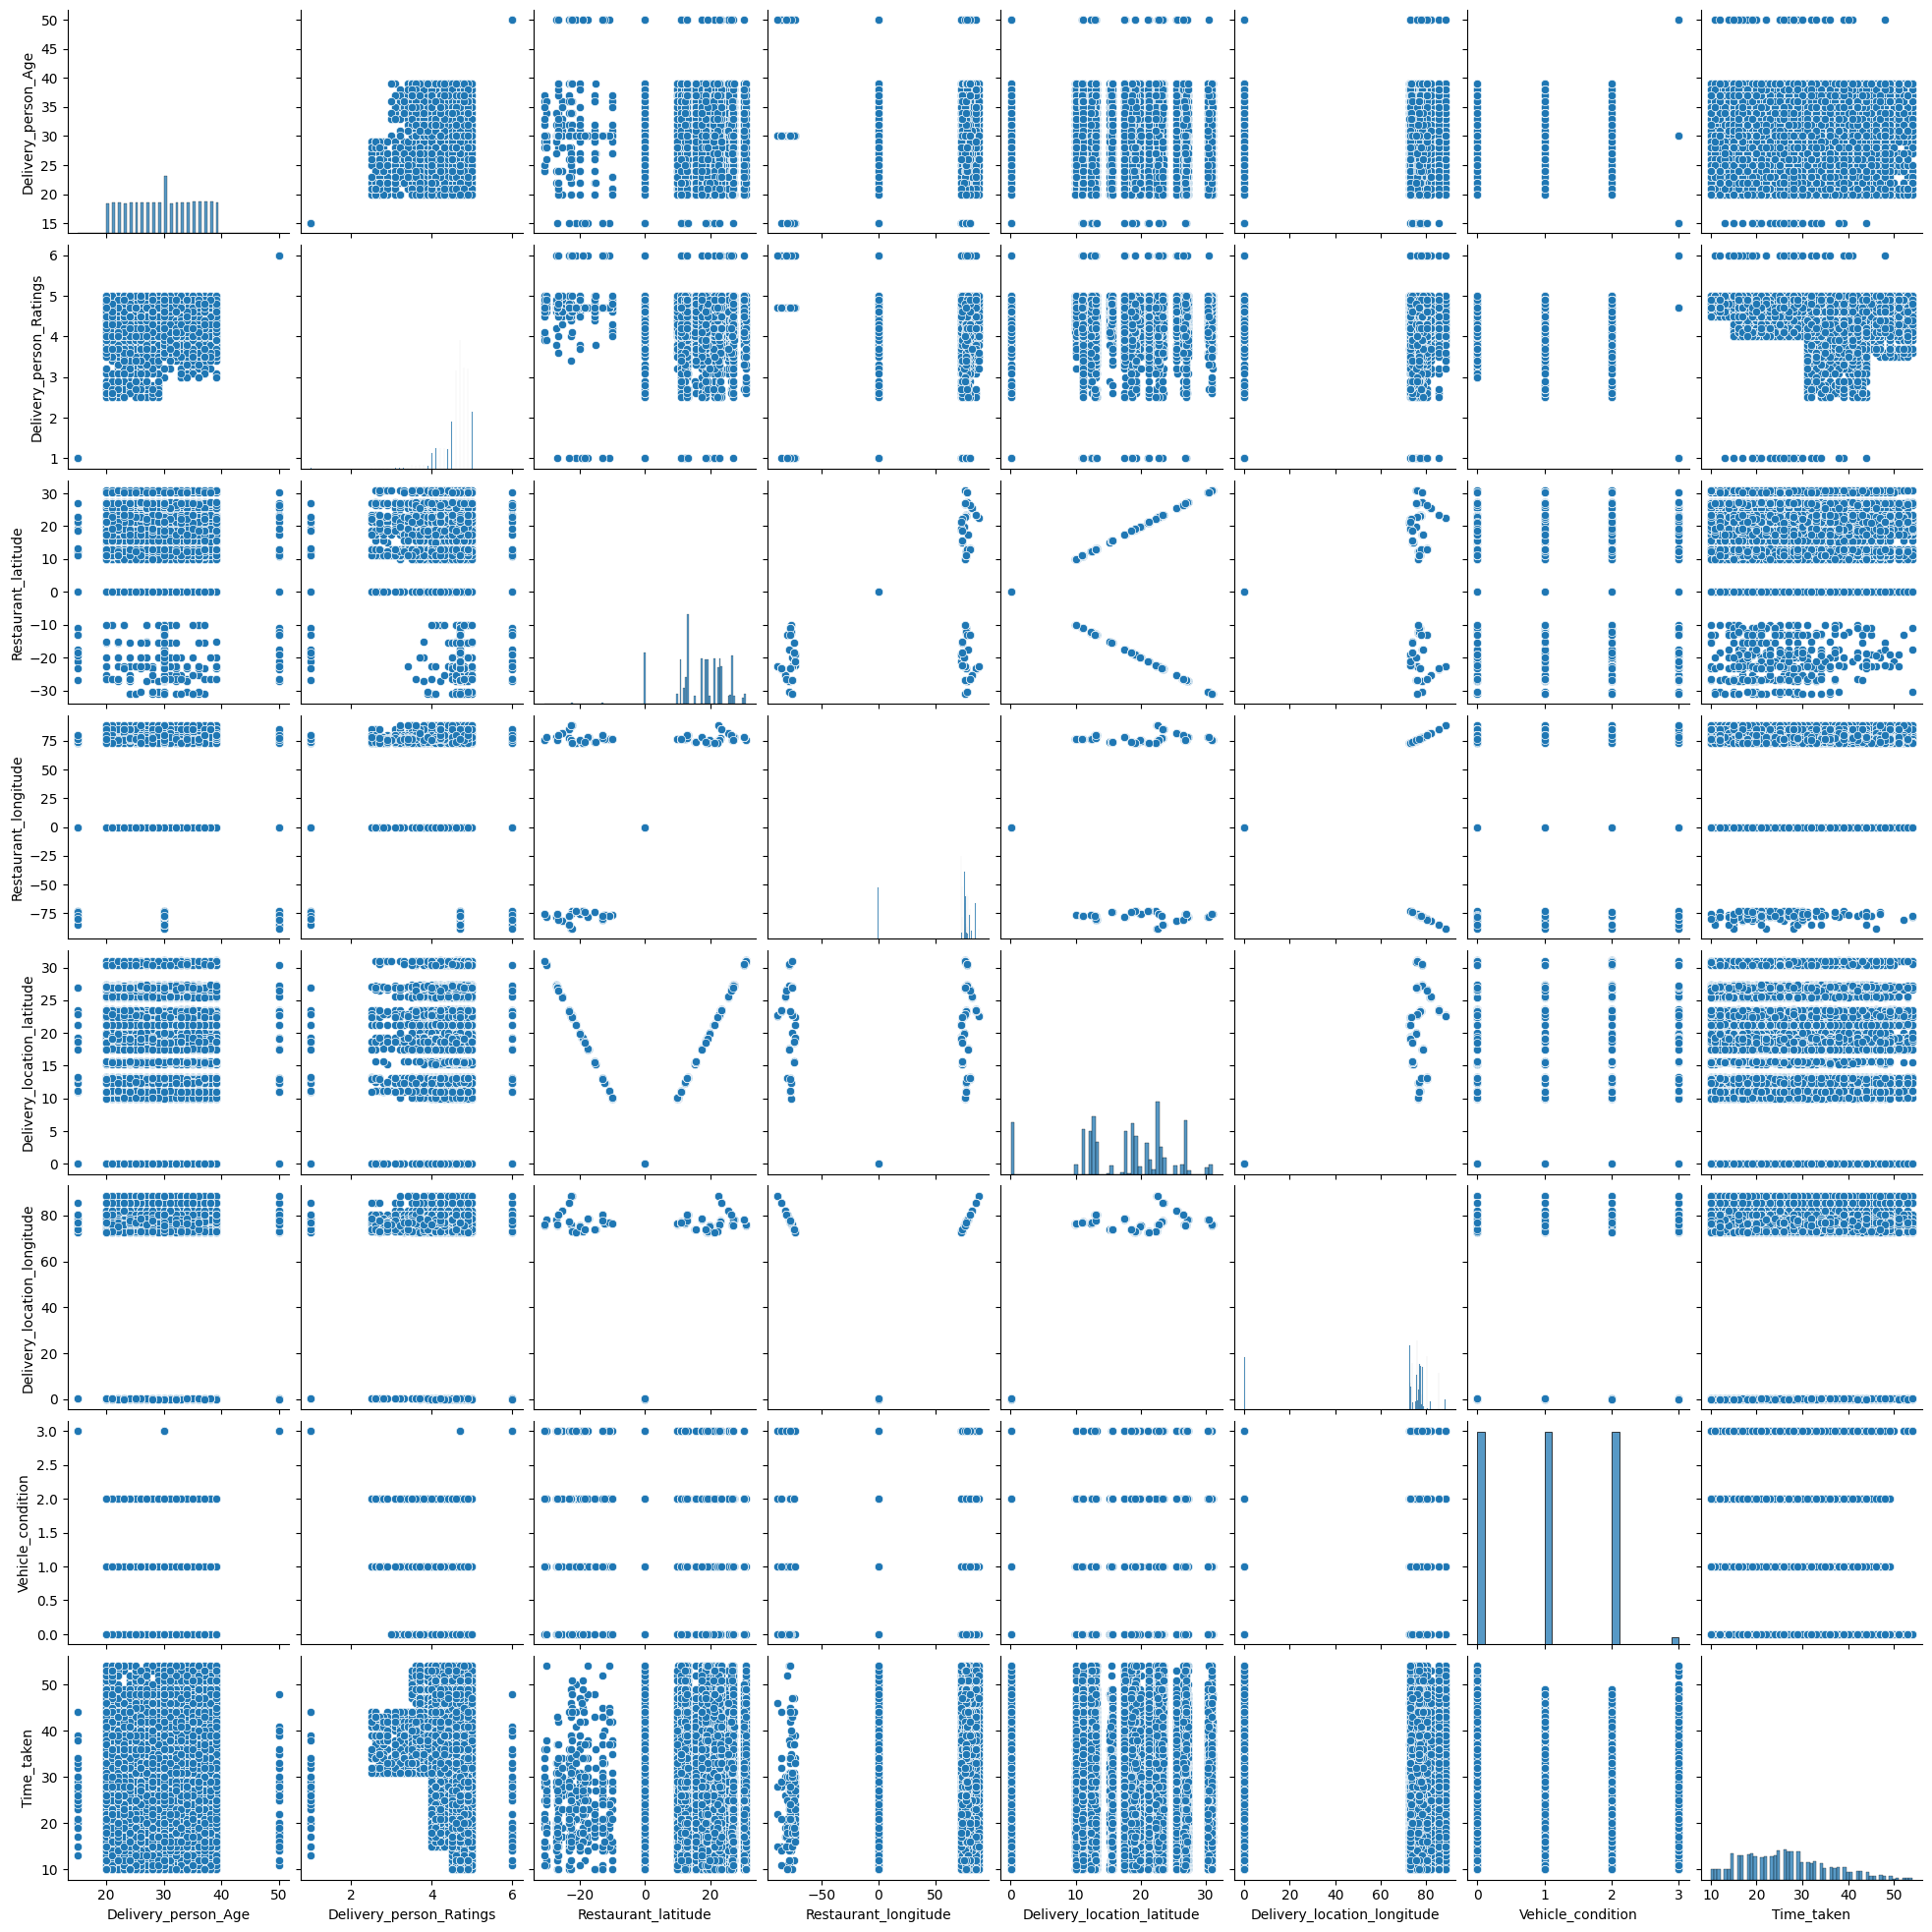

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
df.corr()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,Time_taken
Delivery_person_Age,1.000000,-0.067252,-0.005931,-0.009960,0.002501,-0.000403,0.004788,0.292861
Delivery_person_Ratings,-0.067252,1.000000,-0.011870,-0.016724,-0.009912,-0.013116,0.037386,-0.330729
Restaurant_latitude,-0.005931,-0.011870,1.000000,0.661784,0.866378,0.602713,-0.033551,0.013981
Restaurant_longitude,-0.009960,-0.016724,0.661784,1.000000,0.632293,0.915026,-0.038744,0.007821
Delivery_location_latitude,0.002501,-0.009912,0.866378,0.632293,1.000000,0.690515,-0.001604,0.014243
Delivery_location_longitude,-0.000403,-0.013116,0.602713,0.915026,0.690515,1.000000,-0.001960,0.007625
Vehicle_condition,0.004788,0.037386,-0.033551,-0.038744,-0.001604,-0.001960,1.000000,-0.234398
Time_taken,0.292861,-0.330729,0.013981,0.007821,0.014243,0.007625,-0.234398,1.000000


<Axes: >

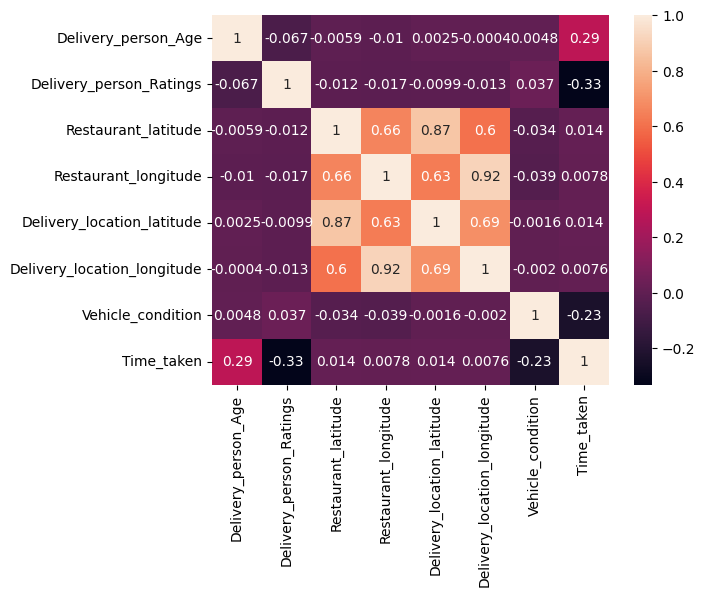

In [ ]:
sns.heatmap(df.corr(),annot=True)

# Column Transformation

In [ ]:
import math
# Define the Haversine formula function
def haversine(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)

    # Radius of the Earth in kilometers
    radius = 6371.0  # You can also use 3958.8 for miles

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = radius * c

    return distance

# Calculate distances for each row
df['distance_km'] = df.apply(lambda row: haversine(row['Restaurant_latitude'], row['Restaurant_longitude'], row['Delivery_location_latitude'], row['Delivery_location_longitude']), axis=1)

# Print the DataFrame with distances
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken,distance_km
0,37,4.9,22.745049,75.892471,22.765049,75.912471,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0,No,Urban,24,3.025149
1,34,4.5,12.913041,77.683237,13.043041,77.813237,19:45:00,19:50:00,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33,20.183530
2,23,4.4,12.914264,77.678400,12.924264,77.688400,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26,1.552758
3,38,4.7,11.003669,76.976494,11.053669,77.026494,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21,7.790401
4,32,4.6,12.972793,80.249982,13.012793,80.289982,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30,6.210138


In [ ]:
df.drop(['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude'],axis=1,inplace=True)

# Outliers

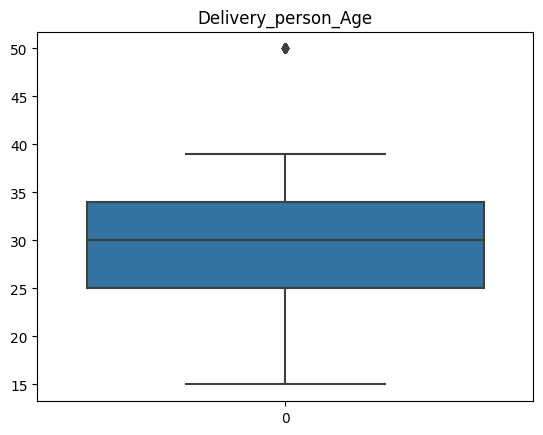

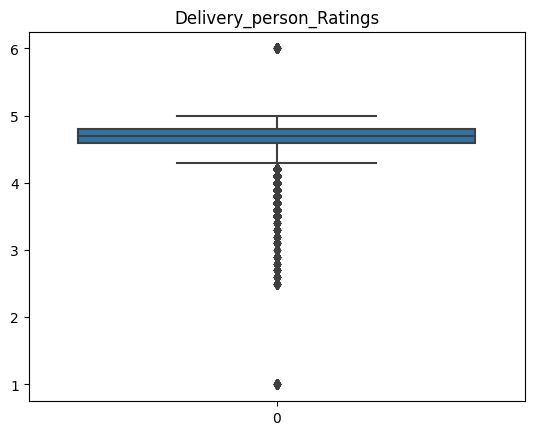

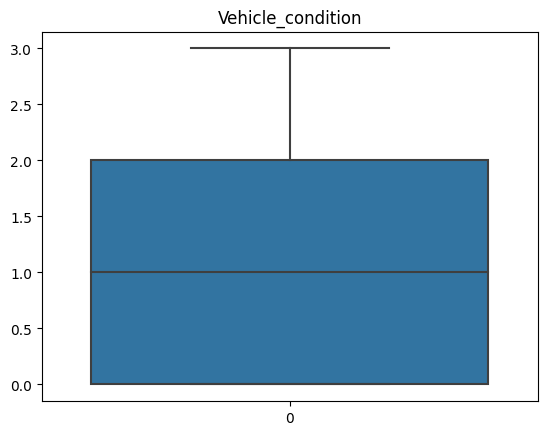

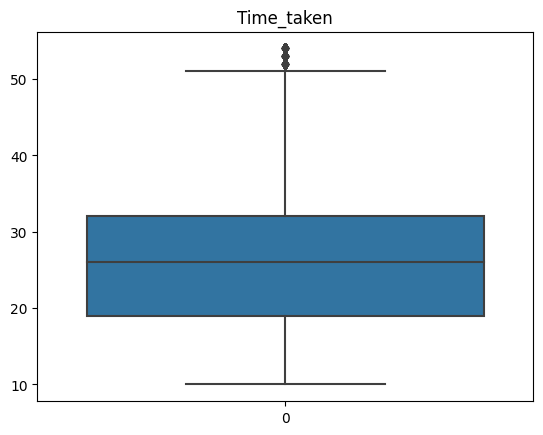

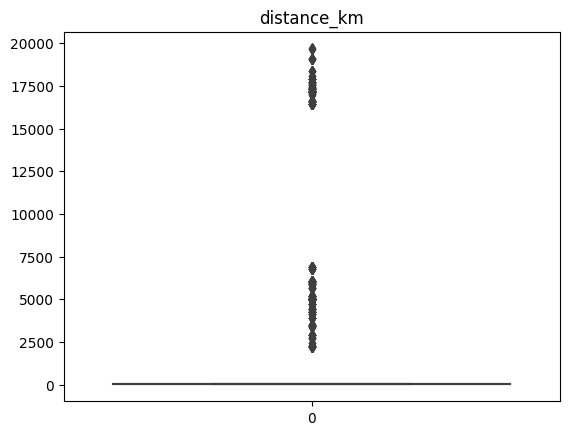

In [ ]:
# Finding Outliers
for i in df.columns:
    if type(df[i][0])!=str:
        sns.boxplot(df[i])
        plt.title(i)
        plt.show()

# Handling Outliers

In [ ]:
IQR=df['Delivery_person_Age'].quantile(0.75)-df['Delivery_person_Age'].quantile(0.25)
upper=df['Delivery_person_Age'].quantile(0.75)+1.5*(IQR)
lower=df['Delivery_person_Age'].quantile(0.25)-1.5*(IQR)
df['Delivery_person_Age']=np.where(df['Delivery_person_Age']>upper,upper,np.where(df['Delivery_person_Age']<lower,lower,df['Delivery_person_Age']))

# Data Distribution

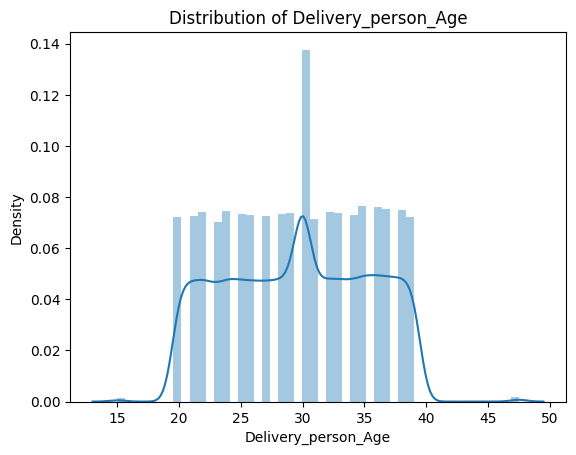

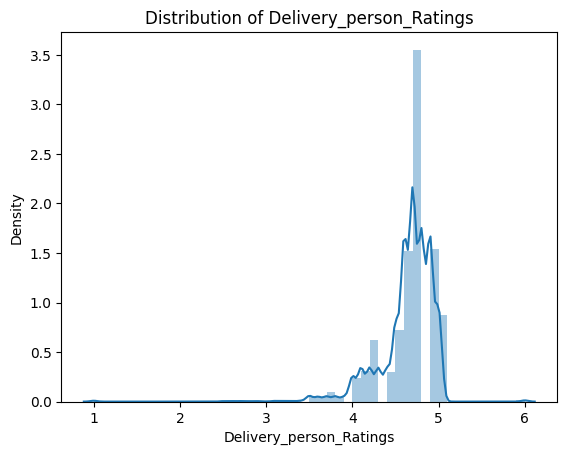

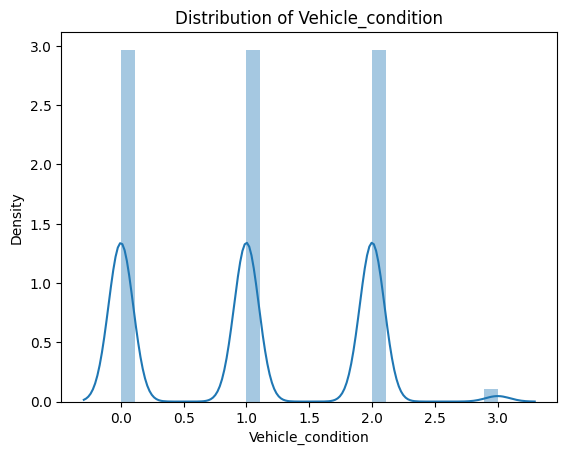

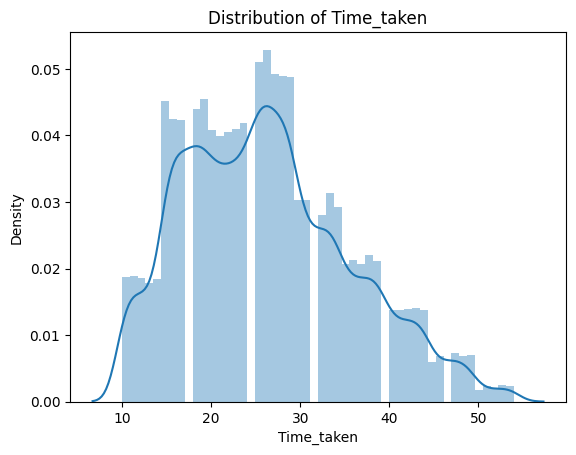

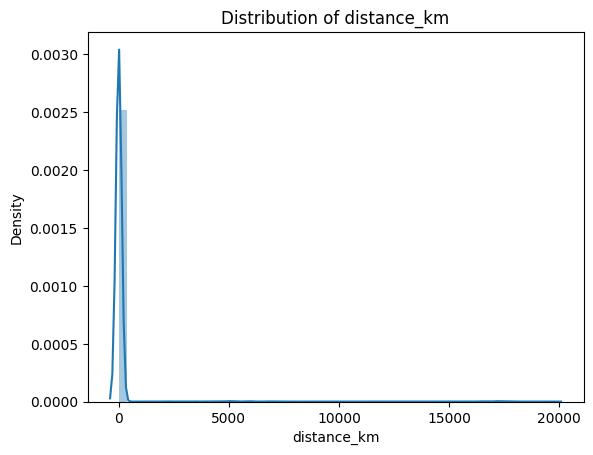

In [ ]:
for column in df.columns:
  if df[column].dtype!='O':
    sns.distplot(df[column])
    plt.title(f'Distribution of {column}')
    plt.show()

# Data Transformation


In [ ]:
df['Delivery_person_Ratings']=np.sqrt(df['Delivery_person_Ratings'])

In [ ]:
df['distance_km']=np.sqrt(df['distance_km'])

# Encoding The Categorical Features

In [ ]:
import pickle
from sklearn.preprocessing import LabelEncoder

# Create a dictionary to store label encoders for each categorical column
label_encoders = {}

# Identify and initialize label encoders for categorical columns
for col in df.columns:
    if df[col].dtype == 'O':  # Check if the column is of object (string) type
        label_encoders[col] = LabelEncoder()  # Initialize a label encoder for the column

label_encoders

{'Time_Orderd': LabelEncoder(),
 'Time_Order_picked': LabelEncoder(),
 'Weatherconditions': LabelEncoder(),
 'Road_traffic_density': LabelEncoder(),
 'Type_of_order': LabelEncoder(),
 'Type_of_vehicle': LabelEncoder(),
 'multiple_deliveries': LabelEncoder(),
 'Festival': LabelEncoder(),
 'City': LabelEncoder()}

In [ ]:
# Apply label encoding to each categorical column
for col in df.columns:
  if df[col].dtype=='O':
    df[col] = label_encoders[col].fit_transform(df[col])
    filename=f"{col}.pkl"
    pickle.dump(label_encoders[col],open(filename,"wb"))

# Splitting the Data For Training and Testing

In [ ]:
x=df.drop(['Time_taken'],axis=1)
y=df['Time_taken']
y

0        24
1        33
2        26
3        21
4        30
         ..
45588    32
45589    36
45590    16
45591    26
45592    36
Name: Time_taken, Length: 45593, dtype: int64

In [ ]:
x.shape

(45593, 13)

# Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [ ]:
filename="ss.pkl"
pickle.dump(ss,open(filename,"wb"))

# Performing Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
X_train

array([[ 1.30452624,  0.47927859,  0.98273118, ..., -0.14158421,
        -0.53884099, -0.28018539],
       [-0.27817414, -1.2517887 , -1.66307185, ..., -0.14158421,
        -0.53884099, -0.17932526],
       [-0.98159654, -0.08505113, -1.50743638, ..., -0.14158421,
        -0.53884099, -0.06048781],
       ...,
       [ 1.65623744,  0.75703378, -1.66307185, ..., -0.14158421,
        -0.53884099, -0.14513488],
       [-0.80574094,  0.75703378,  1.29400213, ..., -0.14158421,
        -0.53884099, -0.11129828],
       [ 0.24939265, -0.08505113, -0.02889939, ..., -0.14158421,
        -0.53884099, -0.08406641]])

In [ ]:
X_test

array([[ 0.07353705,  1.0319689 ,  0.90491344, ...,  7.06293456,
        -0.53884099, -0.03608216],
       [ 0.24939265,  0.19861474,  1.68309081, ..., -0.14158421,
        -0.53884099, -0.01214233],
       [ 0.95281505, -3.11159692,  1.52745533, ..., -0.14158421,
        -0.53884099, -0.00717809],
       ...,
       [-0.62988534,  0.75703378,  0.67146024, ..., -0.14158421,
        -0.53884099,  0.06537191],
       [ 0.07353705,  0.19861474,  1.13836665, ..., -0.14158421,
        -0.53884099, -0.11279916],
       [ 0.77695945,  0.75703378, -1.66307185, ..., -0.14158421,
         1.86548248, -0.18100939]])

In [ ]:
y_train

29044    28
41736    16
17874    28
42093    32
22952    26
         ..
11284    25
44732    19
38158    38
860      29
15795    30
Name: Time_taken, Length: 36474, dtype: int64

In [ ]:
y_test

7725     44
949      41
44893    39
42071    38
27091    38
         ..
7388     15
6330     34
8426     21
768      17
38292    25
Name: Time_taken, Length: 9119, dtype: int64

# Model Building

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
def Predictions(model):
  models=model.fit(X_train,y_train)
  y_pred_test=models.predict(X_test)
  y_pred_train=models.predict(X_train)
  print("R2Score for Training",r2_score(y_pred_train,y_train))
  print("\n")
  print("MSE for Training:", mean_squared_error(y_pred_train,y_train))
  print("\n")
  print("MAE for Training:", mean_squared_error(y_pred_train,y_train))
  print("\n")
  print("R2Score for Testing",r2_score(y_pred_test,y_test))
  print("\n")
  print("MSE for Testing:", mean_squared_error(y_pred_test,y_test))
  print("\n")
  print("MAE for Testing:",mean_absolute_error(y_pred_test,y_test))

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()

In [ ]:
Predictions(knn)

R2Score for Training 0.6572606089590548


MSE for Training: 21.99997916323957


MAE for Training: 21.99997916323957


R2Score for Testing 0.46099662954715037


MSE for Testing: 34.206698102862156


MAE for Testing: 4.552034214277882


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [ ]:
Predictions(dt)

R2Score for Training 1.0


MSE for Training: 0.0


MAE for Training: 0.0


R2Score for Testing 0.6627932418945246


MSE for Testing: 30.16262748108345


MAE for Testing: 4.170084439083233


# RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rd=RandomForestRegressor()

In [ ]:
print("Random Forest Algorithm \n")
Predictions(rd)

Random Forest Algorithm 

R2Score for Training 0.9715153887825534


MSE for Training: 2.2691837336184677


MAE for Training: 2.2691837336184677


R2Score for Testing 0.7828284113251761


MSE for Testing: 16.274351343349053


MAE for Testing: 3.202343458712578


# XGBoost

In [ ]:
from xgboost import XGBRegressor
xg=XGBRegressor()

In [ ]:
Predictions(xg)

R2Score for Training 0.8348740790100423


MSE for Training: 12.099215457210718


MAE for Training: 12.099215457210718


R2Score for Testing 0.7803209961929162


MSE for Testing: 15.956129961834014


MAE for Testing: 3.1873617210936187


In [ ]:
import pickle
filename="rf.pkl"
pickle.dump(random_search,open(filename,"wb"))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at each leaf node
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

In [ ]:
random_search = RandomizedSearchCV(
rd, param_distributions=param_dist, n_iter=10, n_jobs=-1, verbose=1, random_state=42)
# Fit the RandomizedSearchCV to your data
random_search.fit(x, y)
# Get the best model with the tuned hyperparame ters
best_model = random_search.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
Predictions(best_model)

R2Score for Training 0.9055284131717257


MSE for Training: 7.12757352676616


MAE for Training: 7.12757352676616


R2Score for Testing 0.7856290036182828


MSE for Testing: 15.858469909442773


MAE for Testing: 3.1746750652368476


In [ ]:
  model=XGBRegressor(max_depth=5,learning_rate=0.3,colsample_bytree=0.5,n_estimators=250)
Predictions(model)

R2Score for Training 0.813170419479011


MSE for Training: 13.383128115452863


MAE for Training: 2.9140932263071395


R2Score for Testing 0.7533344390441823


MSE for Testing: 17.538057257446482


MAE for Testing: 3.3550340929814686


In [ ]:

param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
}
scoring = 'neg_mean_squared_error'
random_search = RandomizedSearchCV(
    xg,
    param_distributions=param_grid,
    n_iter=25,  # Number of random samples to try
    scoring=scoring,
    cv=5,  # Number of cross-validation folds
    verbose=2,  # Controls the verbosity of the search process
    n_jobs=-1,  # Use all available CPU cores for parallel processing
    random_state=42  # Set a random seed for reproducibility
)



Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 0.9,
                                                             1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'n_estimators': [100, 200, 300, 400],
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
Predictions(random_search)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
R2Score for Training 0.8389010321514038


MSE for Training: 11.672336635946476


MAE for Training: 2.717429130035658


R2Score for Testing 0.7848076574925287


MSE for Testing: 15.39899255764815


MAE for Testing: 3.132830227633189


In [ ]:
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=200, stop=2000, num=10)],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

scoring = 'neg_mean_squared_error'
random_search = RandomizedSearchCV(
    rd,
    param_distributions=param_grid,
    n_iter=25,  # Number of random samples to try
    scoring=scoring,
    cv=5,  # Number of cross-validation folds
    verbose=2,  # Controls the verbosity of the search process
    n_jobs=-1,  # Use all available CPU cores for parallel processing
    random_state=42  # Set a random seed for reproducibility
)
Predictions(random_search)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


In [ ]:
param_dist = {
    'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [None] + list(np.arange(1, 20)),
    'min_samples_split': list(np.arange(2, 21)),
    'min_samples_leaf': list(np.arange(1, 21)),
}

In [ ]:
random_search = RandomizedSearchCV(
    dt, param_distributions=param_dist, n_iter=100, n_jobs=-1, cv=5, verbose=2, random_state=42
)

# Fit the RandomizedSearchCV object to your data
Predictions(random_search)

# Get the best hyperparameters and the best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
R2Score for Training 0.7995217066592465


MSE for Training: 14.720530330005033


MAE for Training: 14.720530330005033


R2Score for Testing 0.7733988125821192


MSE for Testing: 16.517394581752562


MAE for Testing: 3.2303941325000842
Best Hyperparameters: {'splitter': 'best', 'min_samples_split': 18, 'min_samples_leaf': 18, 'max_depth': 11, 'criterion': 'poisson'}


In [ ]:
y_pred = best_model.predict(X_test)
r2_score(y_pred,y_test)

NameError: ignored

# Model Testing

In [ ]:
model = pickle.load(open(r"rf.pkl",'rb'))
scaler=pickle.load(open(r"ss.pkl",'rb'))
encoder1=pickle.load(open(r"Time_Orderd.pkl",'rb'))
encoder2=pickle.load(open(r"Time_Order_picked.pkl",'rb'))
encoder3=pickle.load(open(r"Weatherconditions.pkl",'rb'))
encoder4=pickle.load(open(r"Road_traffic_density.pkl",'rb'))
encoder5=pickle.load(open(r"Type_of_order.pkl",'rb'))
encoder6=pickle.load(open(r"Type_of_vehicle.pkl",'rb'))
encoder7=pickle.load(open(r"Festival.pkl",'rb'))
encoder8=pickle.load(open(r"City.pkl",'rb'))

In [ ]:
Delivery_person_Age=18
Delivery_person_Ratings=4.2
Time_Orderd="11:50:00"
Time_Orderd = encoder1.transform([Time_Orderd])
Time_Order_picked="12:00:00"
Time_Order_picked = encoder2.transform([Time_Order_picked])
Weatherconditions="Sunny"
Weatherconditions = encoder3.transform([Weatherconditions])
Road_traffic_density="Jam "
Road_traffic_density = encoder4.transform([Road_traffic_density])
Vehicle_condition=2
Type_of_order="Snack "
Type_of_order = encoder5.transform([Type_of_order])
Type_of_vehicle="motorcycle "
Type_of_vehicle = encoder6.transform([Type_of_vehicle])
multiple_deliveries=1
Festival="No "
Festival = encoder7.transform([Festival])
city="Urban "
city = encoder8.transform([city])
distance=5.4


In [ ]:
total=[[Delivery_person_Age,Delivery_person_Ratings,Time_Orderd[0],Time_Order_picked[0],Weatherconditions[0],Road_traffic_density[0],Vehicle_condition,Type_of_order[0],Type_of_vehicle[0],multiple_deliveries,Festival[0],city[0],distance]]
prediction = model.predict(scaler.transform(total))
prediction = int(prediction[0])
print(Prediction)

16

In [ ]:
sklearn.__version__

'1.2.2'

In [ ]:
pip install --upgrade scikit-learn==1.2.3


ERROR: Could not find a version that satisfies the requirement scikit-learn==1.2.3 (from versions: 0.9, 0.10, 0.11, 0.12, 0.12.1, 0.13, 0.13.1, 0.14, 0.14.1, 0.15.0, 0.15.1, 0.15.2, 0.16.0, 0.16.1, 0.17, 0.17.1, 0.18, 0.18.1, 0.18.2, 0.19.0, 0.19.1, 0.19.2, 0.20.0, 0.20.1, 0.20.2, 0.20.3, 0.20.4, 0.21.1, 0.21.2, 0.21.3, 0.22, 0.22.1, 0.22.2.post1, 0.23.0, 0.23.1, 0.23.2, 0.24.0, 0.24.1, 0.24.2, 1.0, 1.0.1, 1.0.2, 1.1.0, 1.1.1, 1.1.2, 1.1.3, 1.2.0rc1, 1.2.0, 1.2.1, 1.2.2, 1.3.0rc1, 1.3.0)
ERROR: No matching distribution found for scikit-learn==1.2.3
